In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import seaborn as sns
import statsmodels.api as sms
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
! pip install imblearn
! pip install mlxtend
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
! pip install plotly.express
import plotly.express as px
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("Healthcare_dataset.csv") # upload data

In [3]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [5]:
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

I see there is no null values in the data set, and we can see only the feature count_of_risk is having numerical values rest all categorical

In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Count: {unique_count}")
    print("----------")

Column: Ptid
Unique Values: ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Count: 3424
----------
Column: Persistency_Flag
Unique Values: ['Persistent' 'Non-Persistent']
Count: 2
----------
Column: Gender
Unique Values: ['Male' 'Female']
Count: 2
----------
Column: Race
Unique Values: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Count: 4
----------
Column: Ethnicity
Unique Values: ['Not Hispanic' 'Hispanic' 'Unknown']
Count: 3
----------
Column: Region
Unique Values: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Count: 5
----------
Column: Age_Bucket
Unique Values: ['>75' '55-65' '65-75' '<55']
Count: 4
----------
Column: Ntm_Speciality
Unique Values: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDI

In [9]:
list(df.columns)

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_Freq_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorde

In [10]:
skewness = df.skew()

print(skewness)

Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64


In [12]:
df_without_first_column = df.iloc[:, 1:]

for column in df_without_first_column.columns:
    value_counts = df_without_first_column[column].value_counts()
    
    print(f"Column: {column}")
    print(f"Unique Values: {value_counts.index.tolist()}")
    print(f"Count:\n{value_counts}\n----------")

Column: Persistency_Flag
Unique Values: ['Non-Persistent', 'Persistent']
Count:
Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64
----------
Column: Gender
Unique Values: ['Female', 'Male']
Count:
Female    3230
Male       194
Name: Gender, dtype: int64
----------
Column: Race
Unique Values: ['Caucasian', 'Other/Unknown', 'African American', 'Asian']
Count:
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
----------
Column: Ethnicity
Unique Values: ['Not Hispanic', 'Hispanic', 'Unknown']
Count:
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
----------
Column: Region
Unique Values: ['Midwest', 'South', 'West', 'Northeast', 'Other/Unknown']
Count:
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
----------
Column: Age_Bucket
Unique Values: ['>75', '

Column: Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
Unique Values: ['N', 'Y']
Count:
N    2242
Y    1182
Name: Concom_Cholesterol_And_Triglyceride_Regulating_Preparations, dtype: int64
----------
Column: Concom_Narcotics
Unique Values: ['N', 'Y']
Count:
N    2191
Y    1233
Name: Concom_Narcotics, dtype: int64
----------
Column: Concom_Systemic_Corticosteroids_Plain
Unique Values: ['N', 'Y']
Count:
N    2451
Y     973
Name: Concom_Systemic_Corticosteroids_Plain, dtype: int64
----------
Column: Concom_Anti_Depressants_And_Mood_Stabilisers
Unique Values: ['N', 'Y']
Count:
N    2465
Y     959
Name: Concom_Anti_Depressants_And_Mood_Stabilisers, dtype: int64
----------
Column: Concom_Fluoroquinolones
Unique Values: ['N', 'Y']
Count:
N    2787
Y     637
Name: Concom_Fluoroquinolones, dtype: int64
----------
Column: Concom_Cephalosporins
Unique Values: ['N', 'Y']
Count:
N    2821
Y     603
Name: Concom_Cephalosporins, dtype: int64
----------
Column: Concom_Macrolides_And_Simila

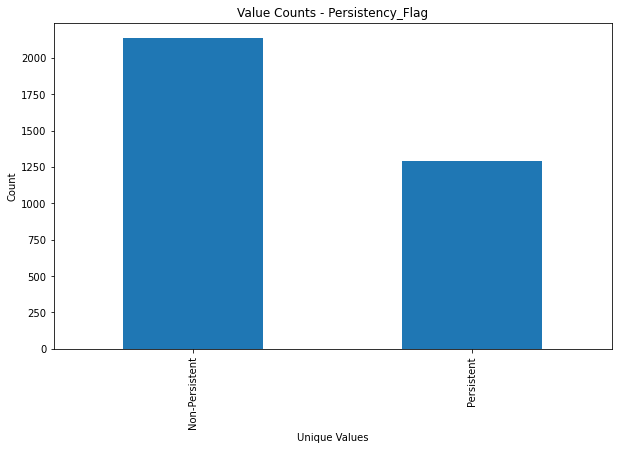

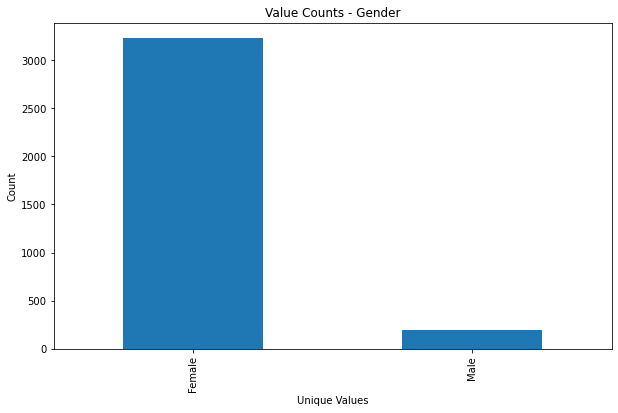

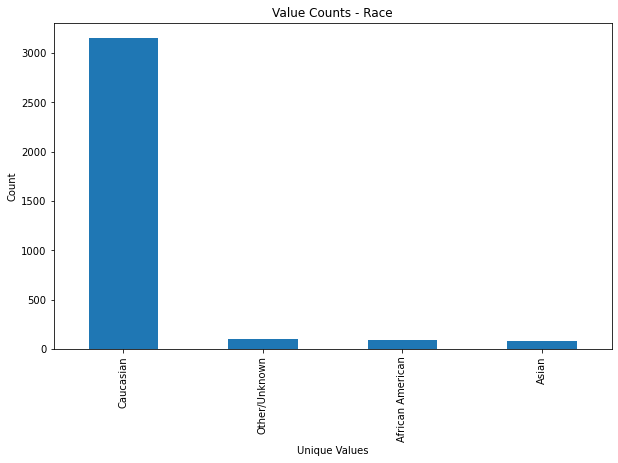

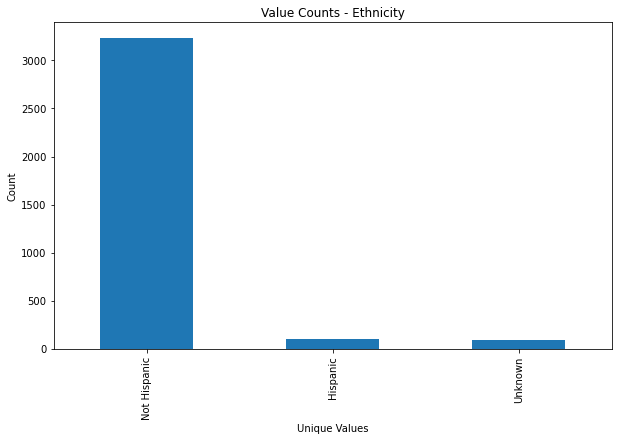

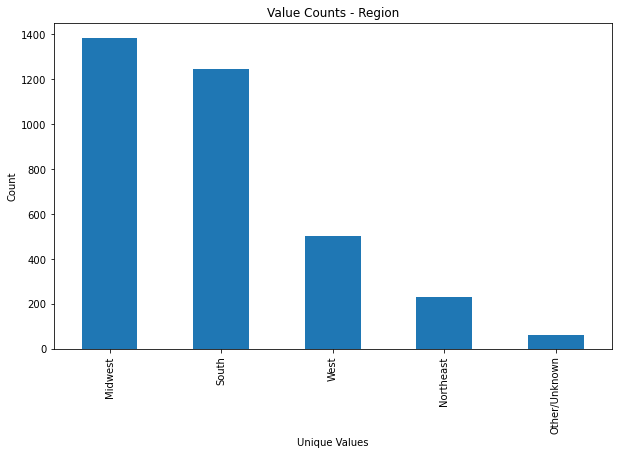

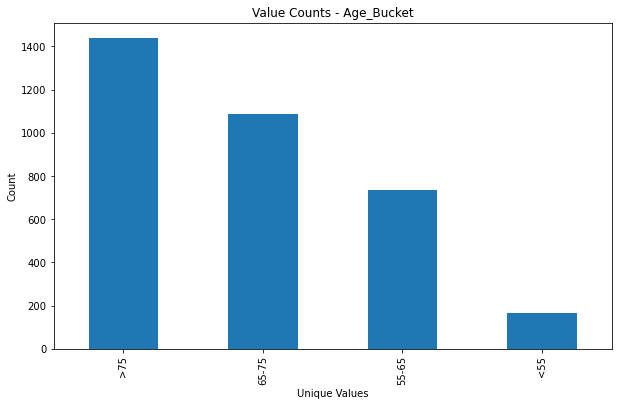

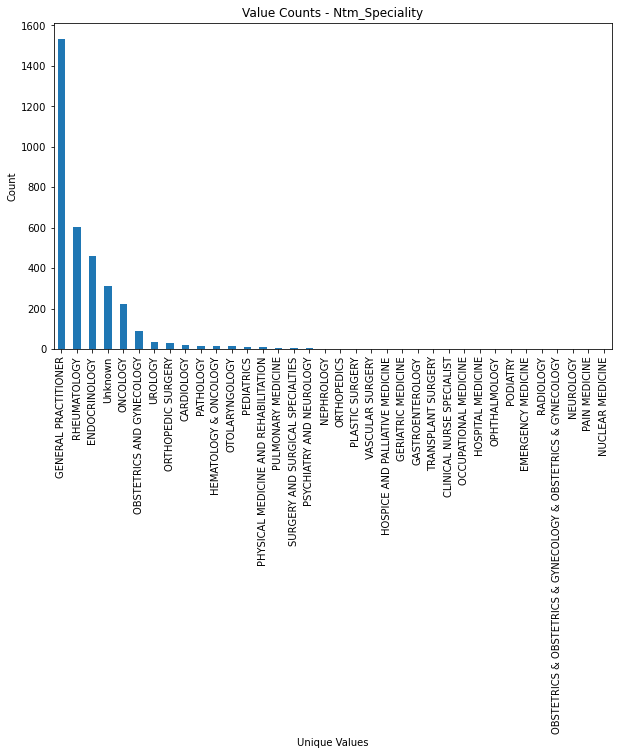

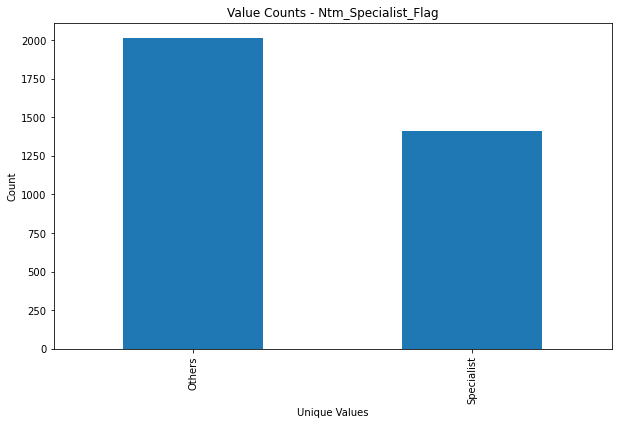

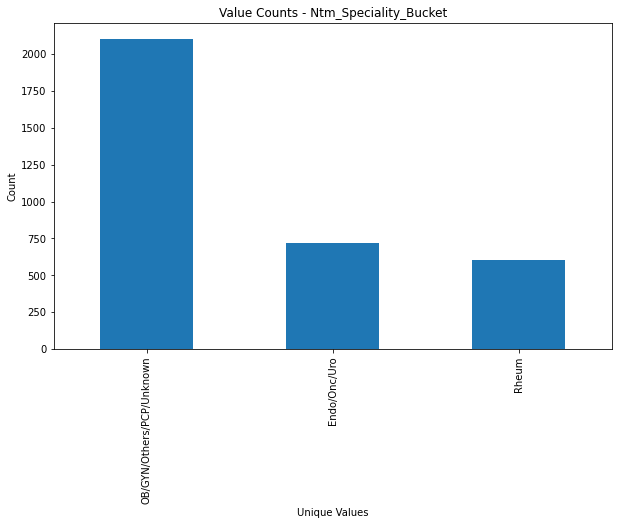

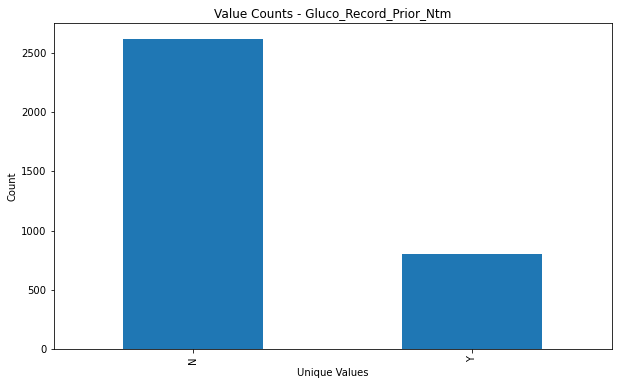

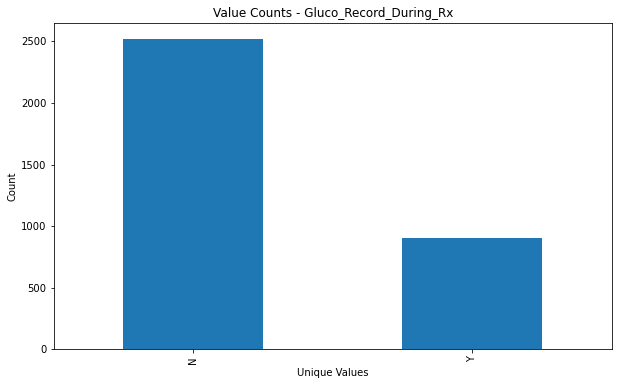

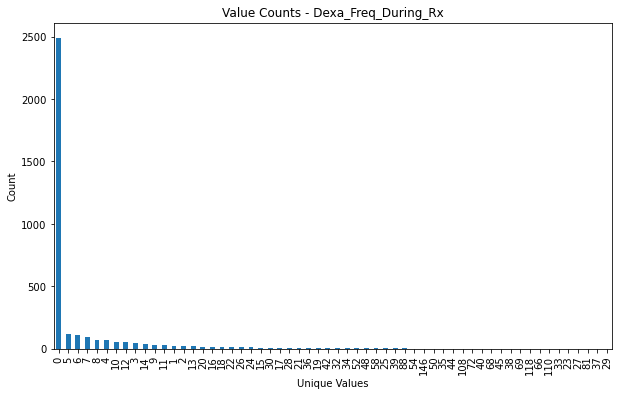

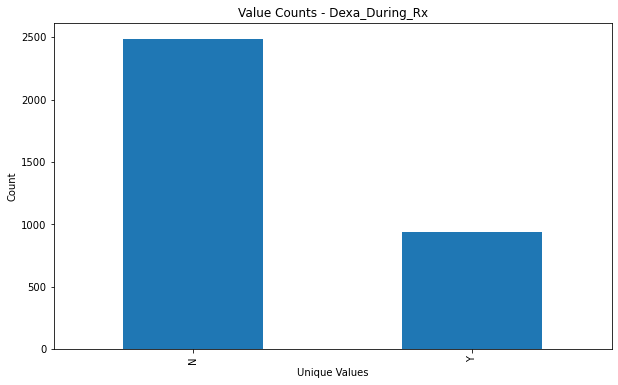

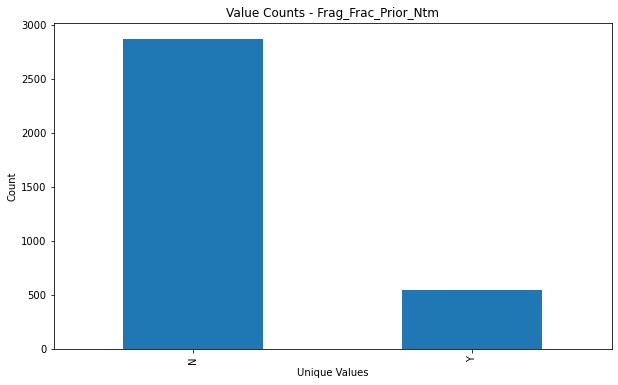

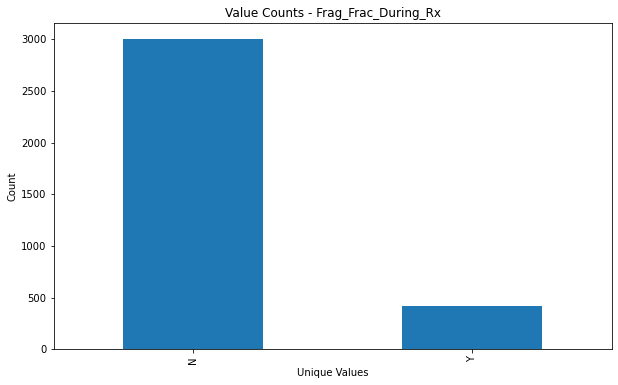

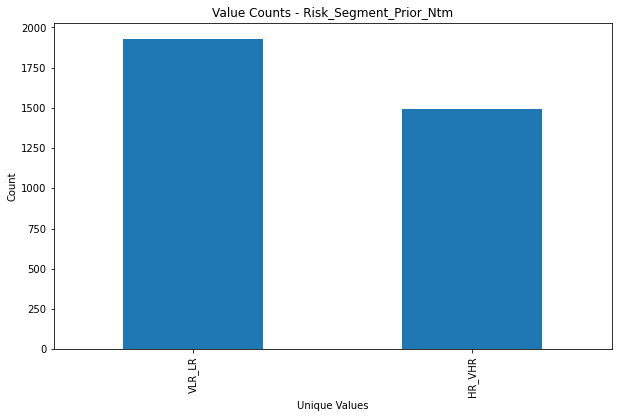

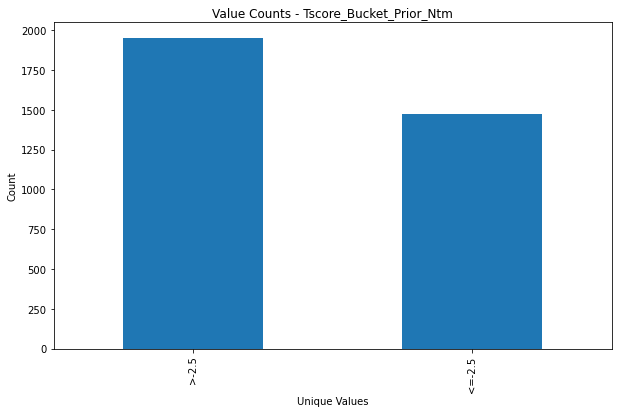

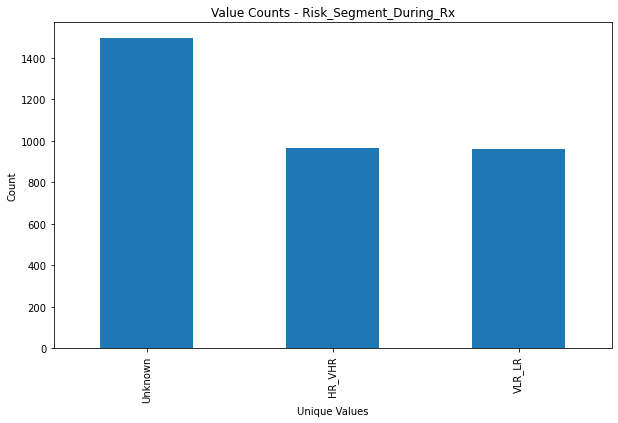

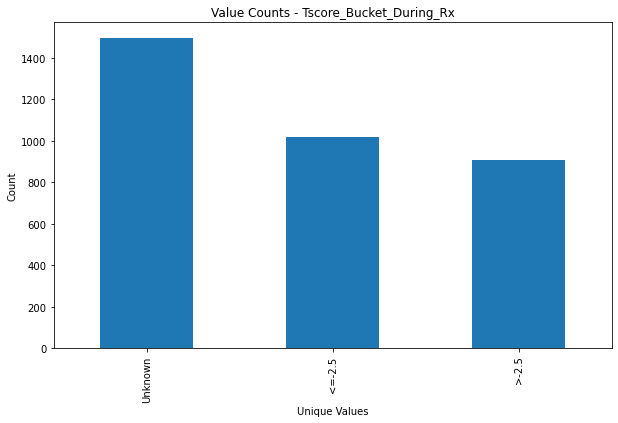

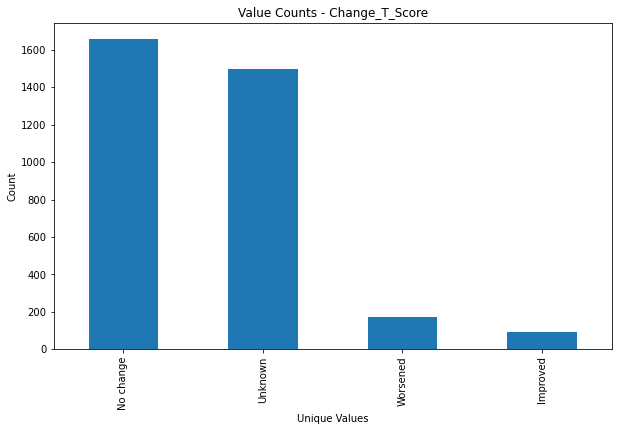

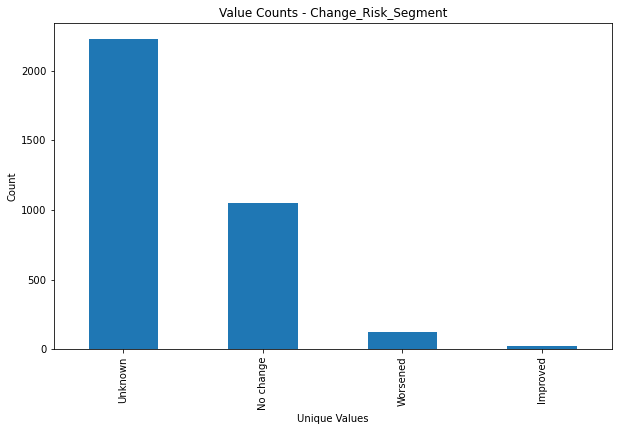

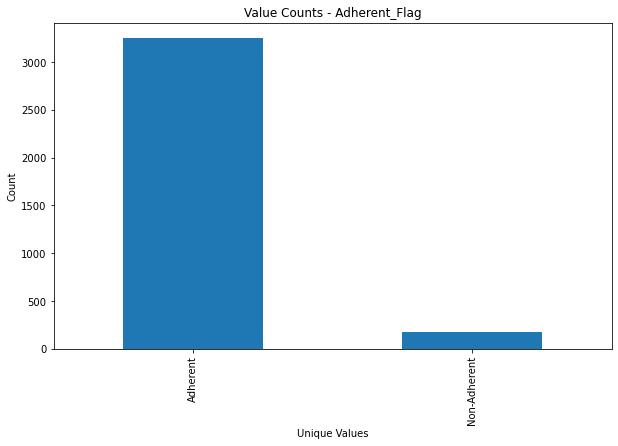

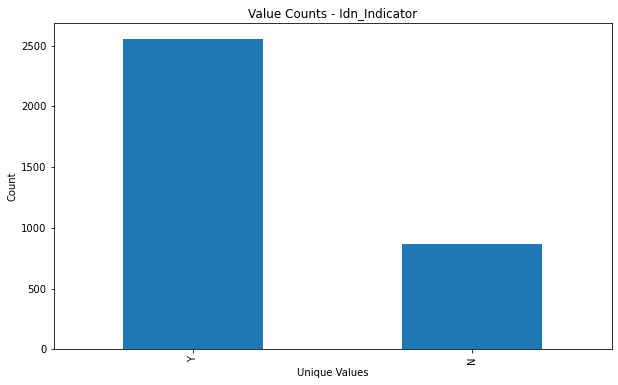

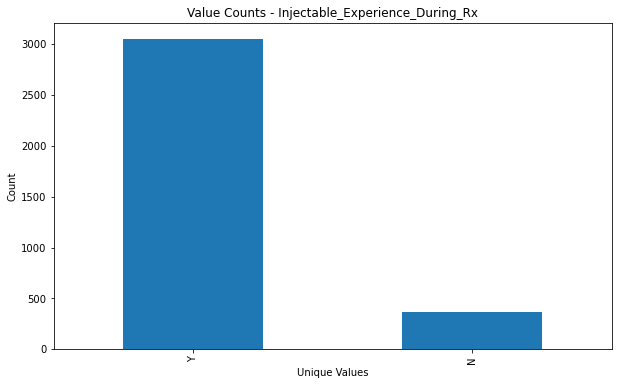

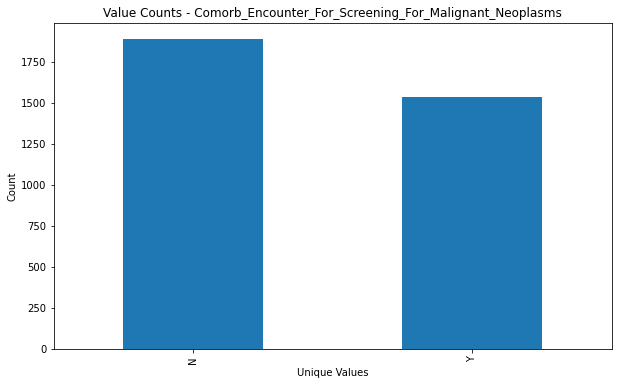

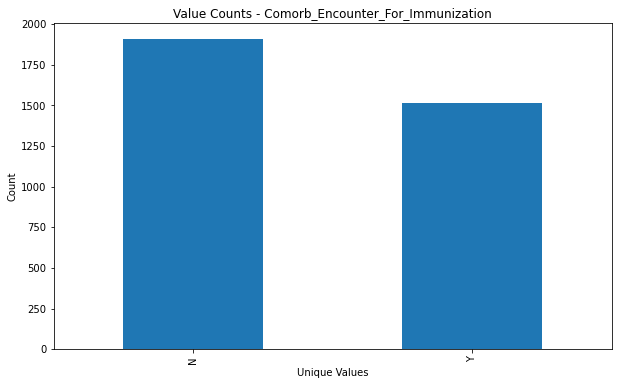

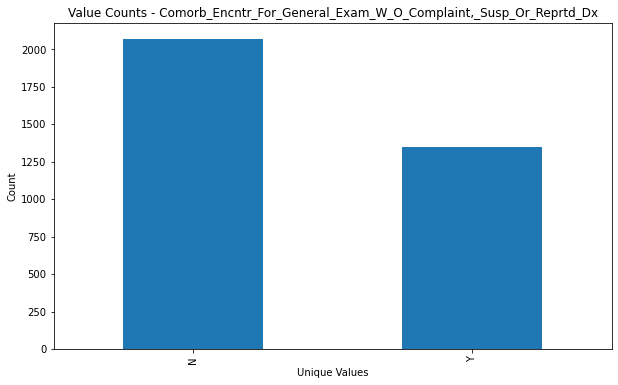

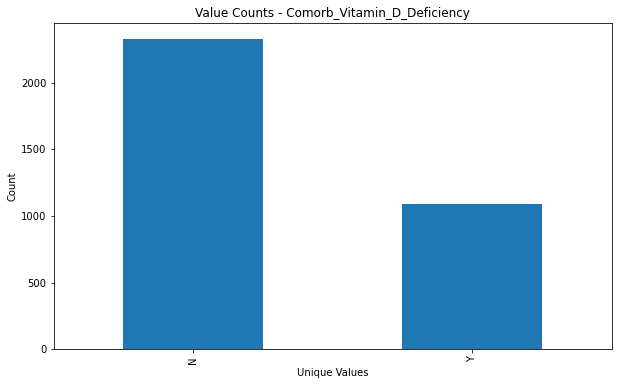

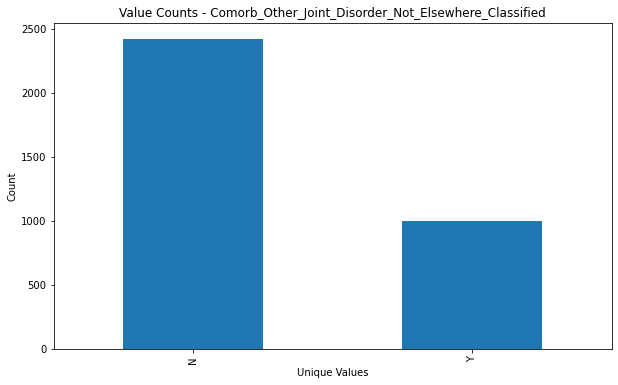

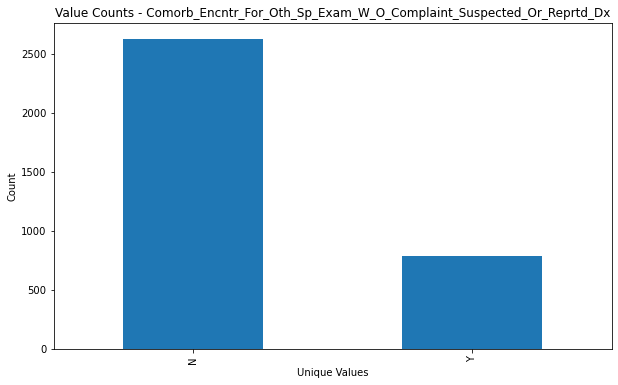

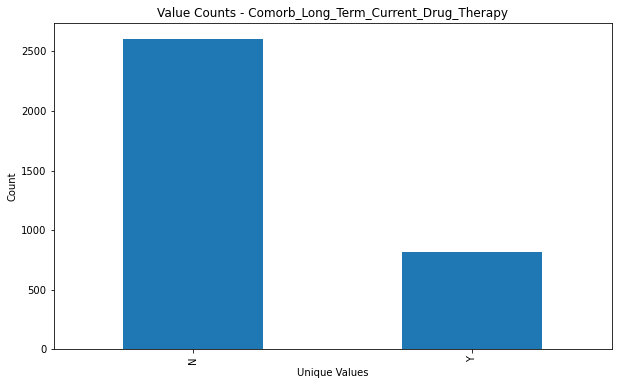

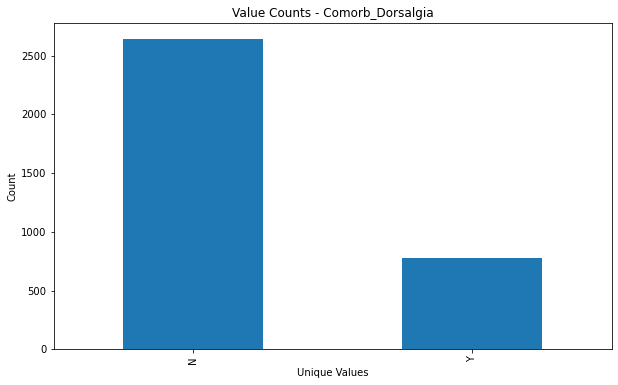

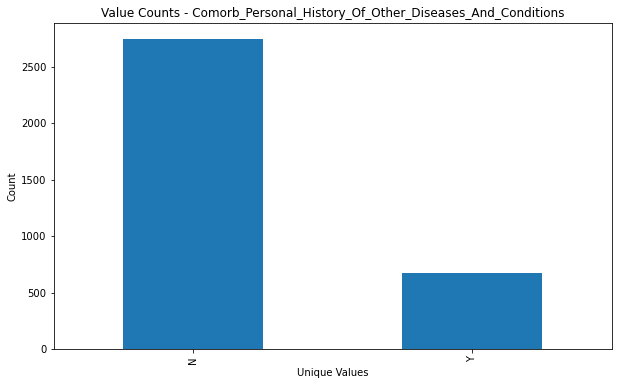

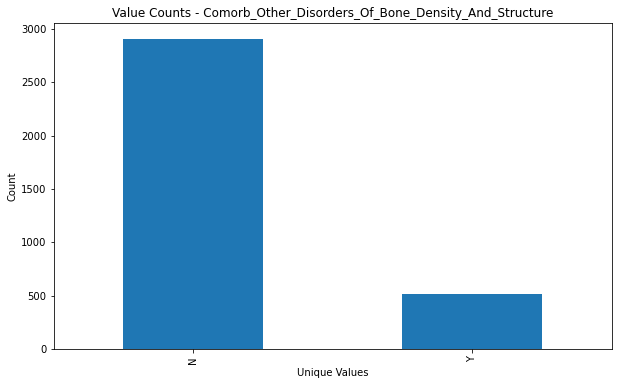

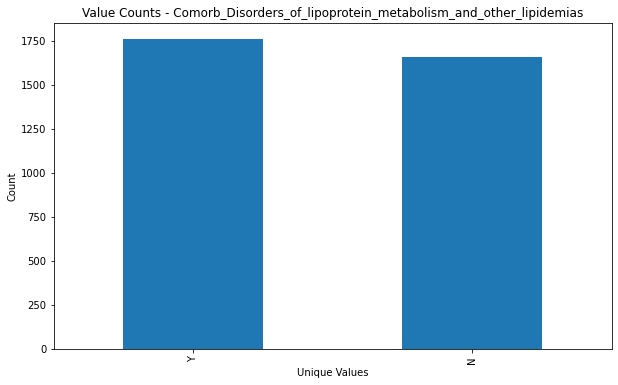

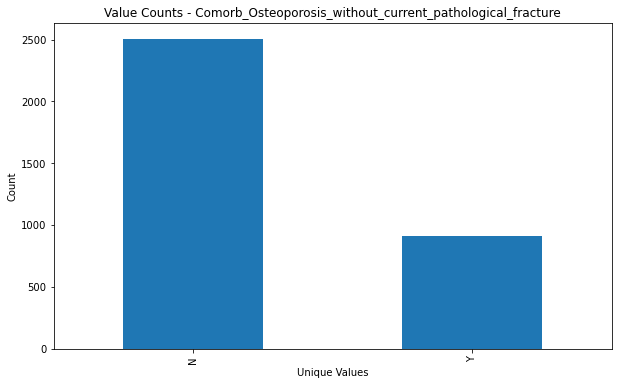

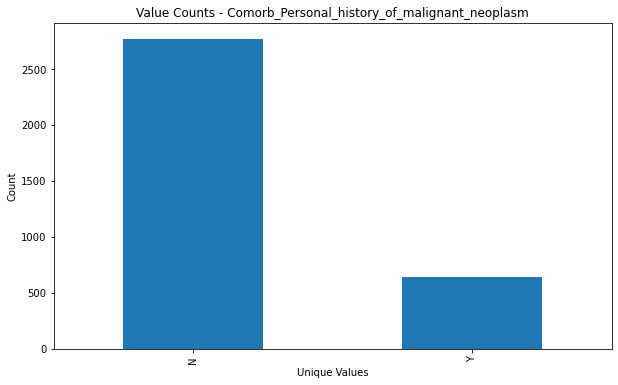

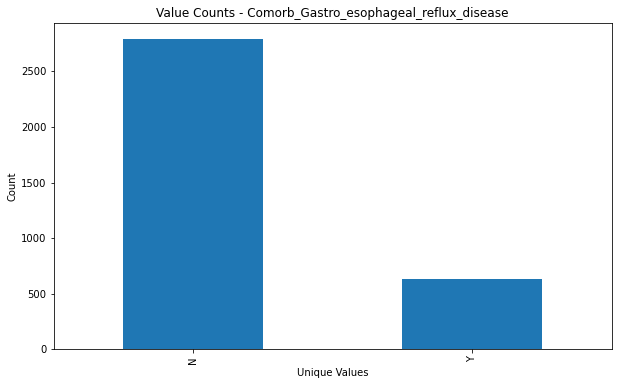

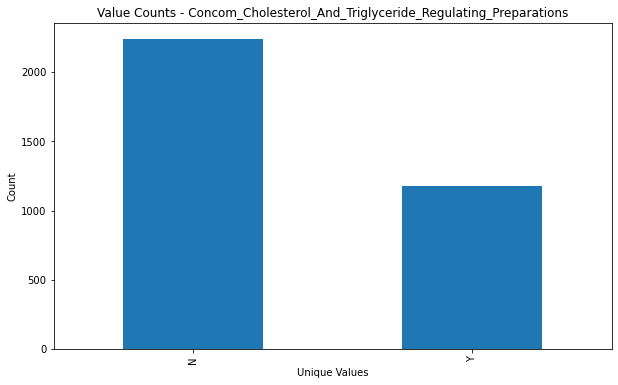

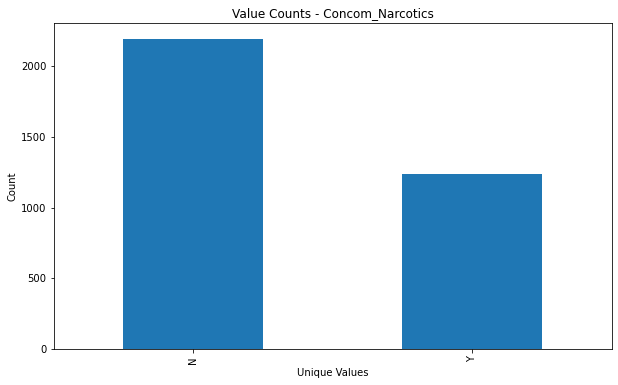

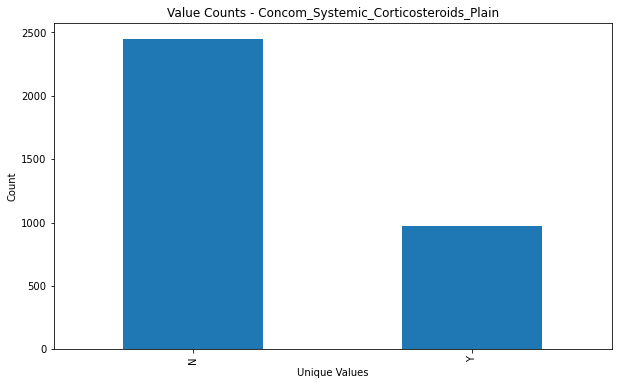

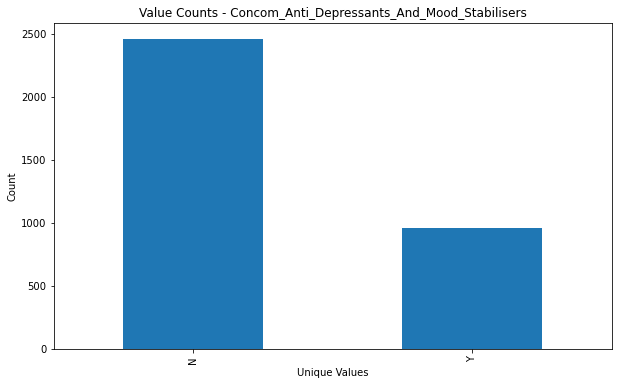

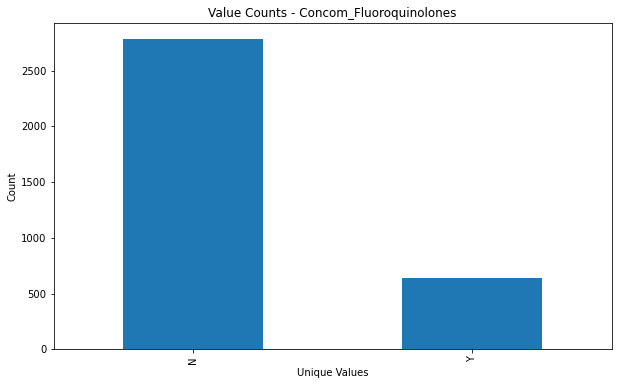

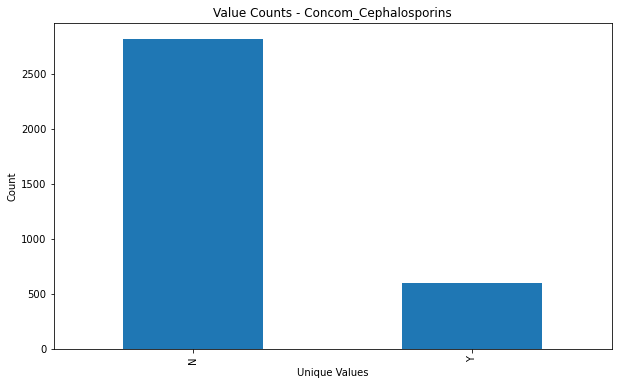

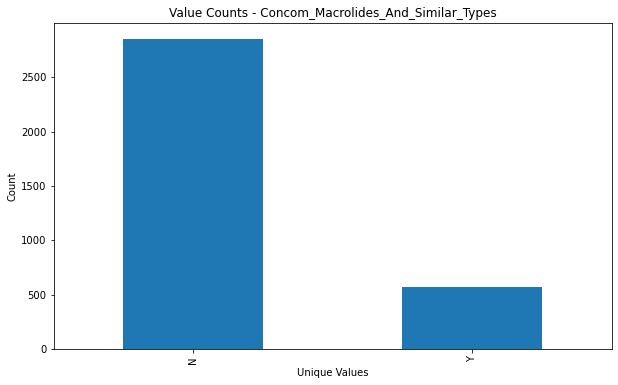

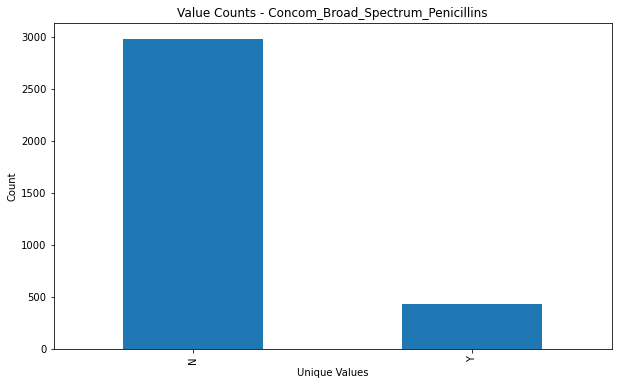

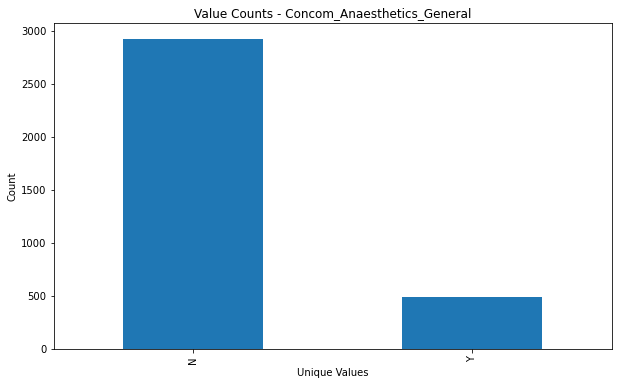

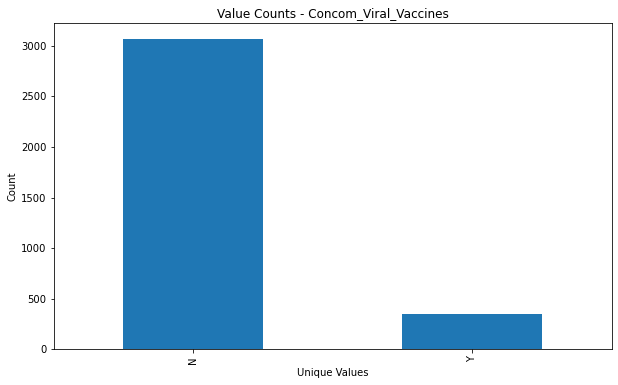

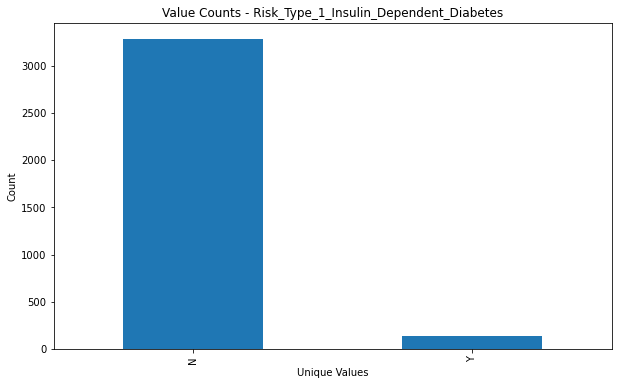

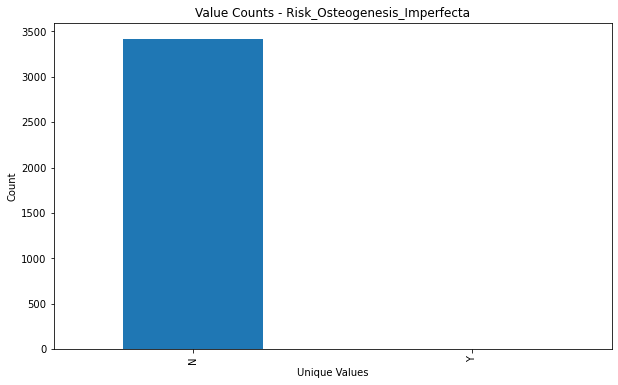

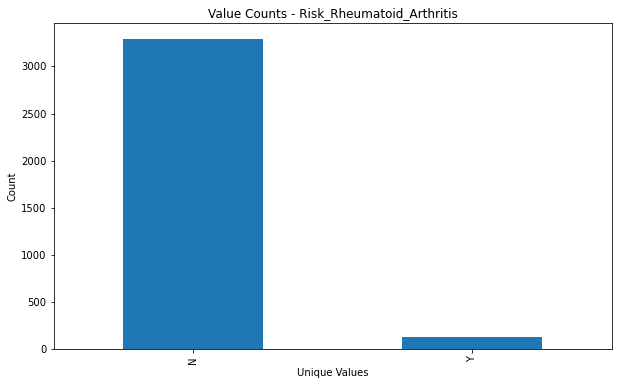

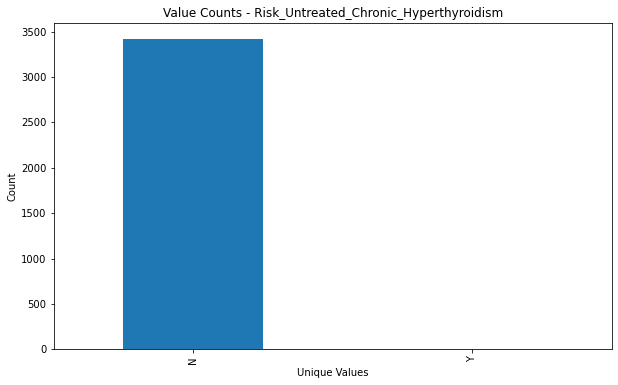

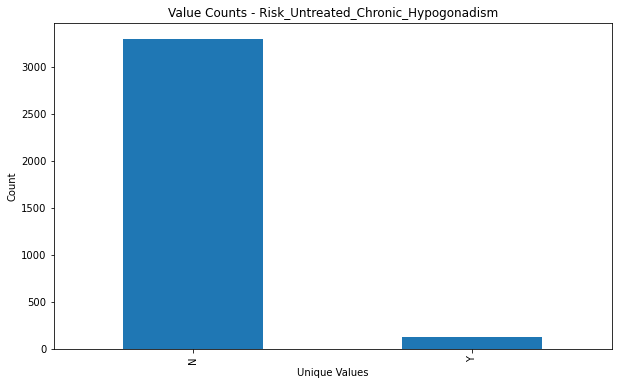

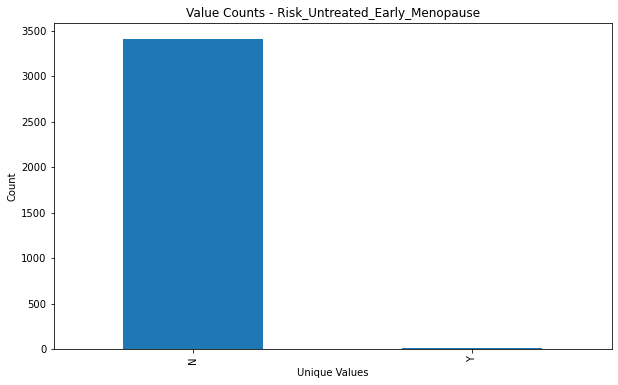

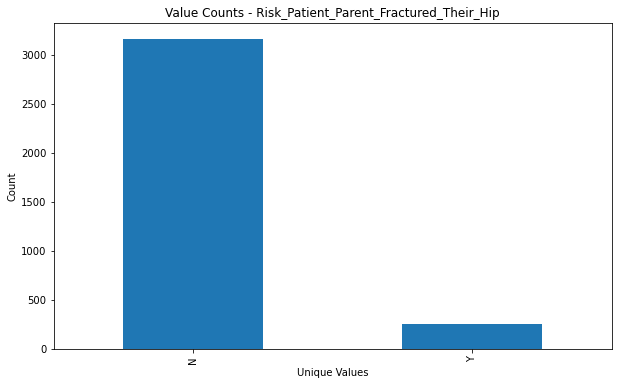

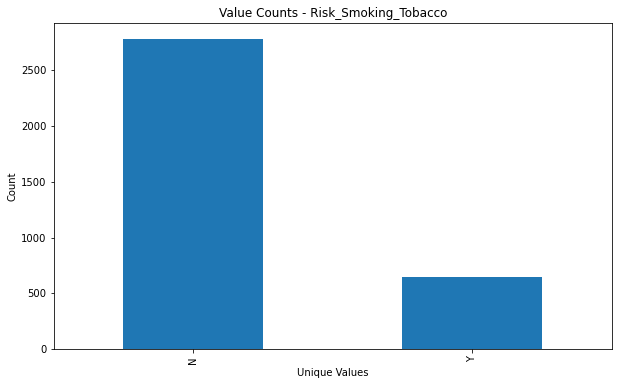

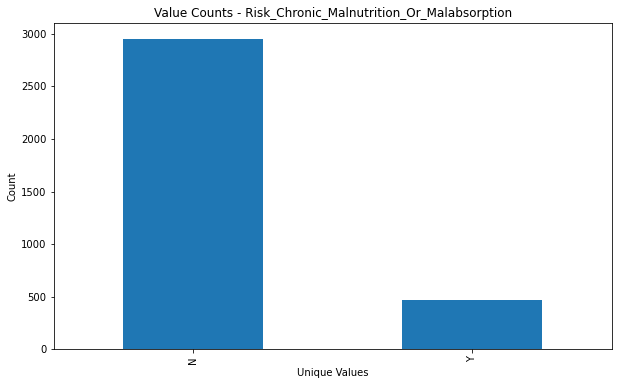

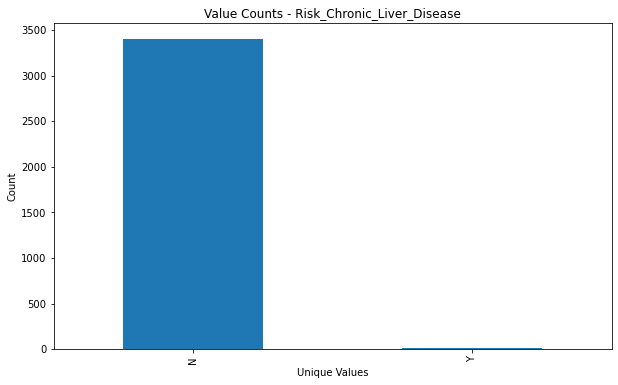

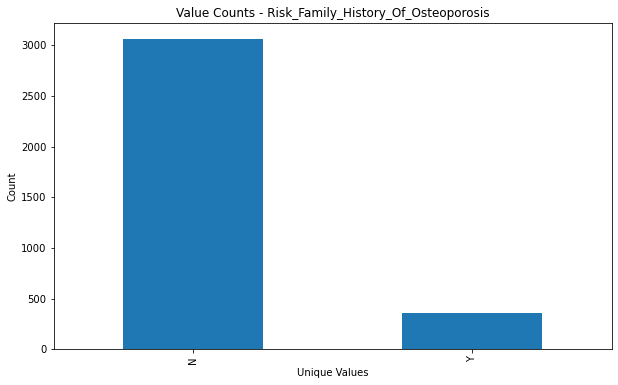

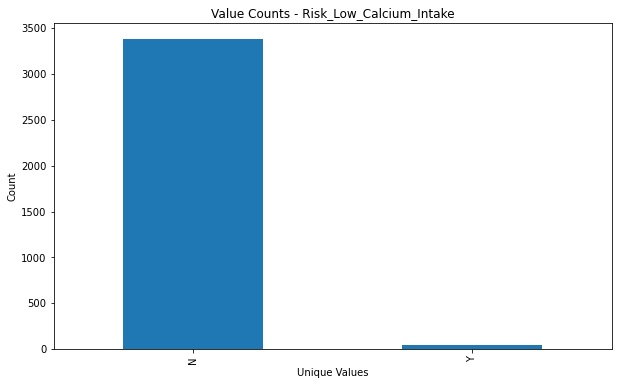

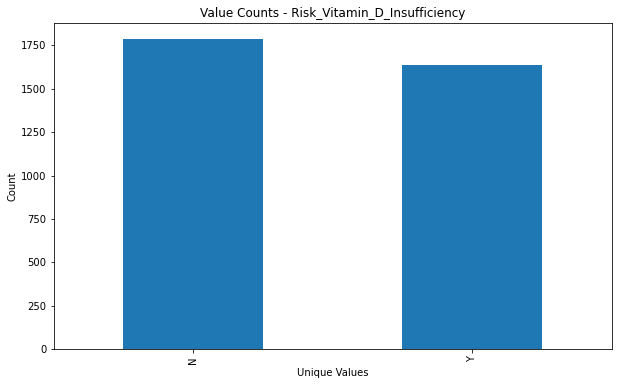

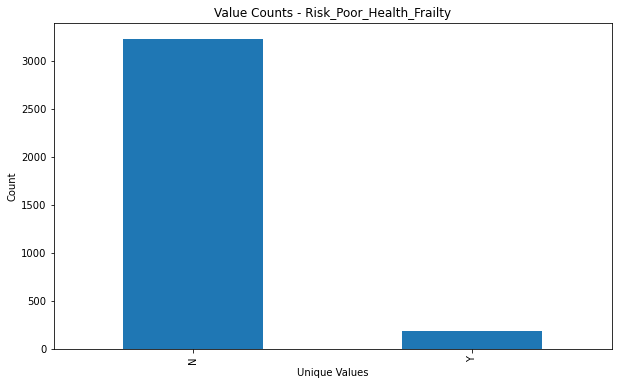

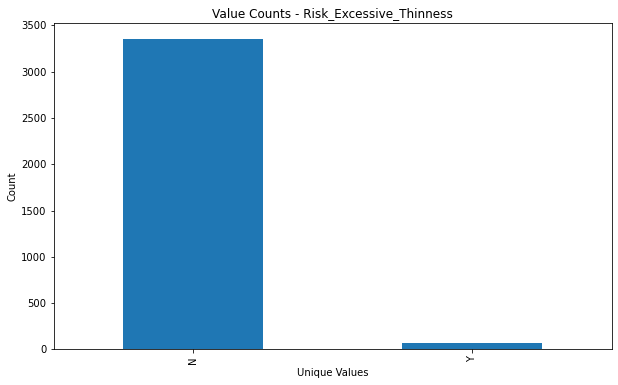

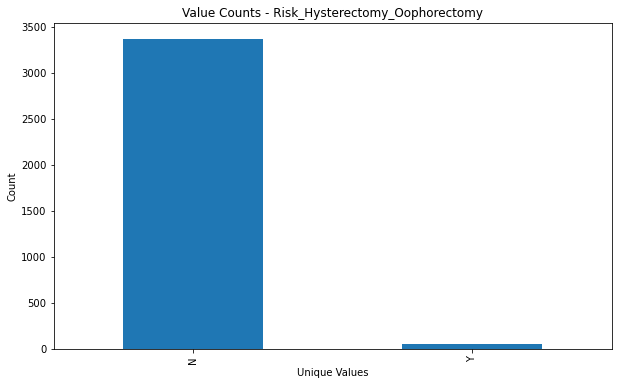

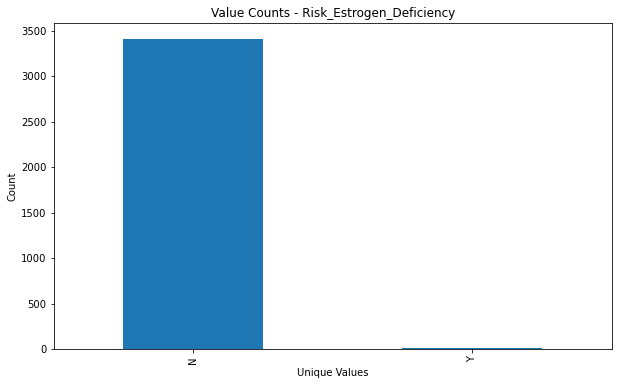

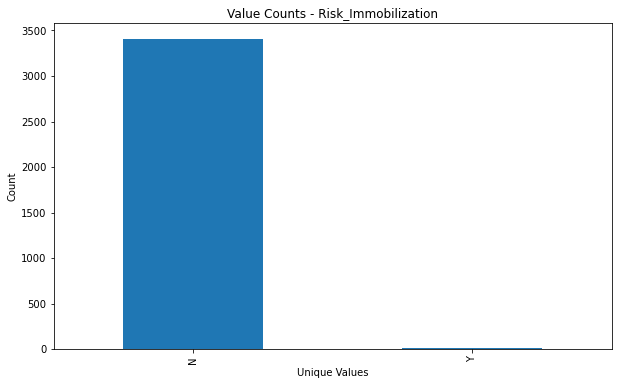

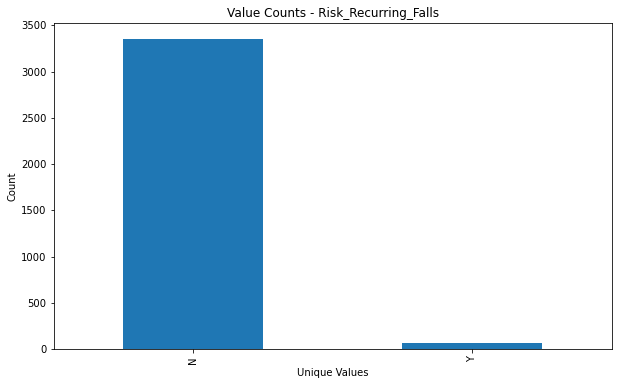

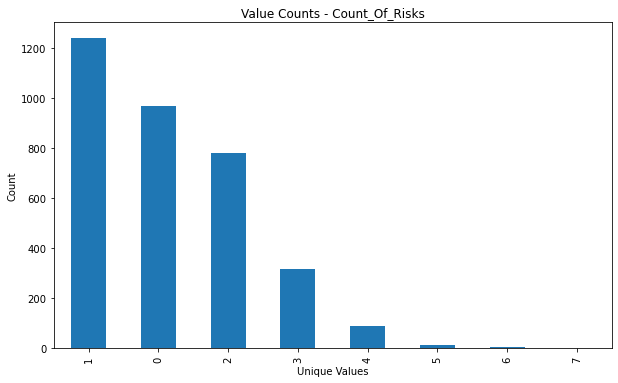

In [15]:
for column in df_without_first_column.columns:
    value_counts = df_without_first_column[column].value_counts()    
    
    plt.figure(figsize=(10, 6)) 
    value_counts.plot(kind='bar')
    
    plt.title(f"Value Counts - {column}")
    plt.xlabel("Unique Values")
    plt.ylabel("Count")
    
    plt.show()

In [25]:
column = df['Dexa_Freq_During_Rx']

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = column[(column < lower_bound) | (column > upper_bound)]
outliers = outliers.sort_values(ascending=True)
# Print the outliers
print(outliers)

3414      8
1151      8
1148      8
2612      8
2617      8
       ... 
2028     88
2603    108
1901    110
2033    118
2215    146
Name: Dexa_Freq_During_Rx, Length: 460, dtype: int64


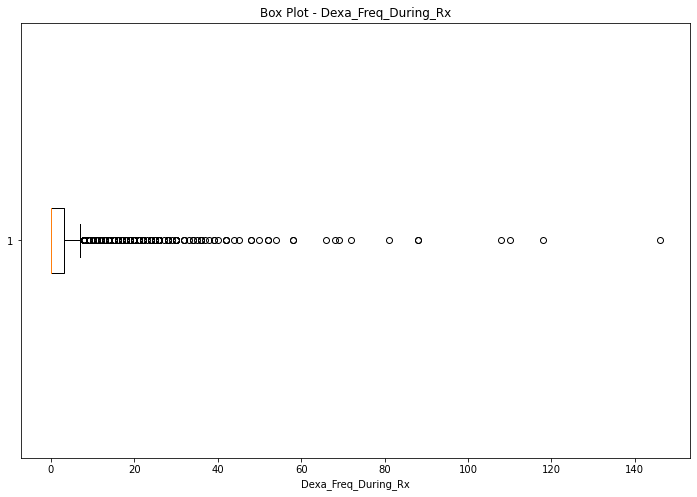

In [22]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['Dexa_Freq_During_Rx'], vert=False)

plt.xlabel('Dexa_Freq_During_Rx')
plt.title('Box Plot - Dexa_Freq_During_Rx')

plt.show()

We can see that there are 460 outliers in the column Dexa_Freq_During_Rx

In [26]:
unknown_values = {}

for column in df.columns:
    unknown_count = df[column].eq('Unknown').sum()
    
    if unknown_count > 0:
        unknown_values[column] = unknown_count

for column, count in unknown_values.items():
    print(f"Column: {column}")
    print(f"Unknown Values Count: {count}")
    print("----------")

Column: Ethnicity
Unknown Values Count: 91
----------
Column: Ntm_Speciality
Unknown Values Count: 310
----------
Column: Risk_Segment_During_Rx
Unknown Values Count: 1497
----------
Column: Tscore_Bucket_During_Rx
Unknown Values Count: 1497
----------
Column: Change_T_Score
Unknown Values Count: 1497
----------
Column: Change_Risk_Segment
Unknown Values Count: 2229
----------


we can observe that there are high number of missing values in the columns Change_Risk_Segment, Change_T_Score, Tscore_Bucket_During_Rx, Risk_Segment_During_Rx. In Ntm_Speciality and Ethnicity are having less number of missing values.

remo